In [16]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


import pathlib
dataset_url = "/content/drive/MyDrive/Walmart.csv"
data_dir = pathlib.Path(dataset_url)





import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [26]:
from gc import collect; # garbage collection to free up memory
from warnings import filterwarnings; # handle warning messages

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra

import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

# Set the plot style to 'fivethirtyeight'
plt.style.use("fivethirtyeight")

from datetime import datetime  # Importing the datetime class from the datetime module

from scipy import stats # statistical functions

filterwarnings('ignore'); # Ignore warning messages
from IPython.display import display_html, clear_output; # displaying HTML content


clear_output();
print();
collect();

In [28]:
try:
    # Attempt to read the dataset
    df = pd.read_csv('/content/drive/MyDrive/Walmart.csv')
    print("Dataset loaded successfully.")

except FileNotFoundError:
    # Handle FileNotFoundError if the file does not exist
    print("Error: File not found. Please check the file path.")

except Exception as e:
    # Handle other exceptions
    print("An error occurred while loading the dataset:", e)

print();
collect();

Dataset loaded successfully.



In [32]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [33]:
df.columns = df.columns.str.lower()

print("\nNew column names:")
print(df.columns)


New column names:
Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')


In [34]:
df.isna().sum()

,0
store,0
date,0
weekly_sales,0
holiday_flag,0
temperature,0
fuel_price,0
cpi,0
unemployment,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   int64  
 1   date          6435 non-null   object 
 2   weekly_sales  6435 non-null   float64
 3   holiday_flag  6435 non-null   int64  
 4   temperature   6435 non-null   float64
 5   fuel_price    6435 non-null   float64
 6   cpi           6435 non-null   float64
 7   unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [36]:
df

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [37]:
try:
    df['date'] = pd.to_datetime(df['date'], format='mixed')
    print("All values in 'date' column are valid dates.")
except ValueError as e:
    print("Error:", e)
    print("There are non-date values present in the 'date' column.")

All values in 'date' column are valid dates.


In [38]:
duplicate_values=df.duplicated().sum()
print(f'The data contains {duplicate_values} duplicate values')

The data contains 0 duplicate values


Removing duplicate values

In [39]:
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

The dataset contains 6435 rows and 8 columns


In [40]:
df.describe().style.background_gradient(cmap='bone_r')

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
count,6435.000000,6435,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 20:18:27.692307712,1046964.877562,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-01-10 00:00:00,209986.250000,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-12 00:00:00,553350.105000,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,960746.040000,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-03-02 00:00:00,1420158.660000,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-12-10 00:00:00,3818686.450000,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,nan,564366.622054,0.255049,18.444933,0.459020,39.356712,1.875885


Feature Engineering

In [41]:
def date_to_season(date):
    # Extract month from date string and convert it to integer
    month = datetime.strptime(date, "%Y-%m-%d").month

    # Map months to seasons
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
    else:
        return "Winter"

# Apply date_to_season function to create a new column
df["season"] = df["date"].apply(lambda x: date_to_season(x.strftime("%Y-%m-%d")))


In [49]:
df

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,season
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Spring
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Winter
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Winter
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Winter
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Spring
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,Autumn
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,Spring
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,Winter
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,Autumn


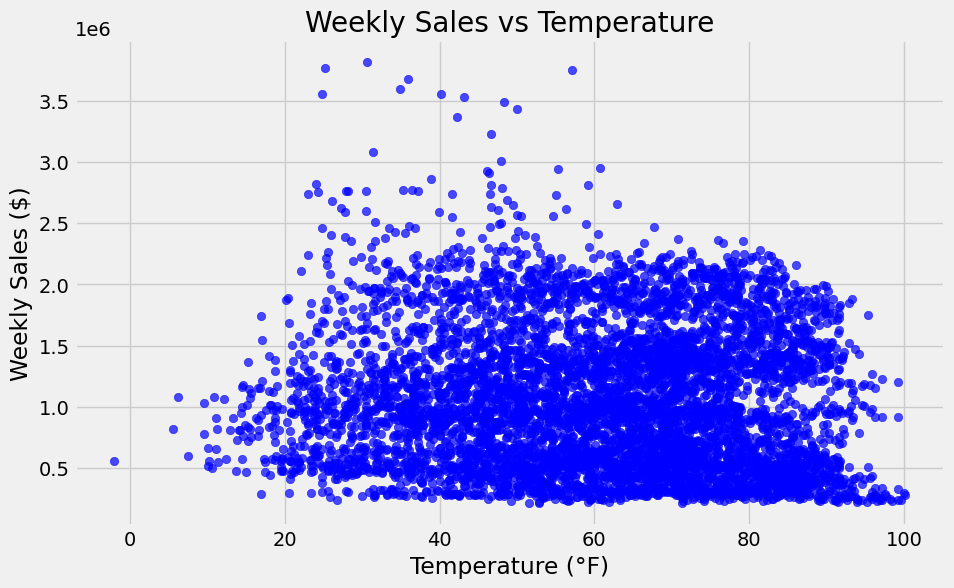

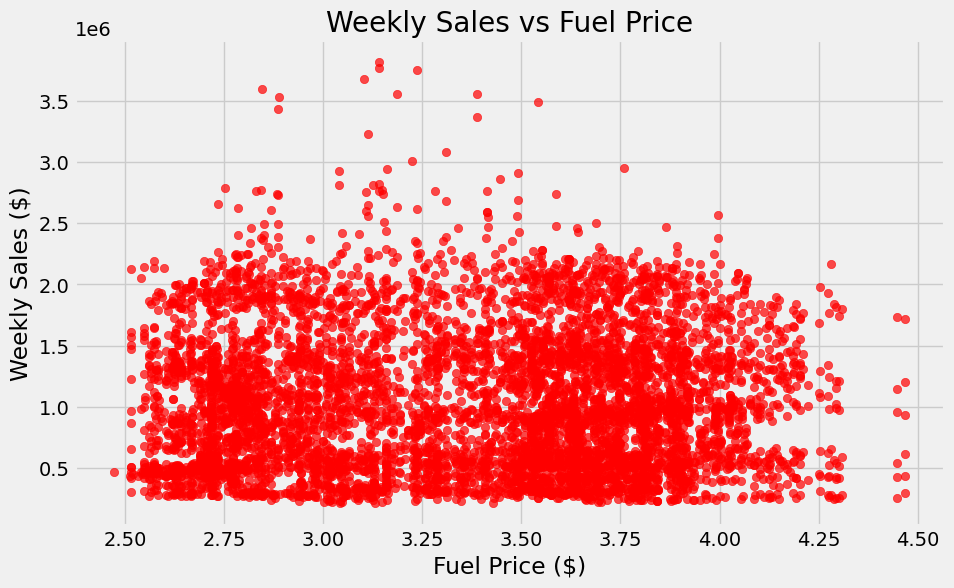

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# data = {
#     'temperature': [65, 70, 75, 80, 85, 90, 95, 100, 60, 55],
#     'fuel_price': [3.5, 3.6, 3.4, 3.5, 3.8, 3.7, 3.9, 4.0, 3.3, 3.2],
#     'weekly_sales': [20000, 22000, 24000, 23000, 25000, 26000, 27000, 28000, 19000, 18000]
# }
# df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.scatter(df['temperature'], df['weekly_sales'], color='b', alpha=0.7)
plt.xlabel('Temperature (°F)')
plt.ylabel('Weekly Sales ($)')
plt.title('Weekly Sales vs Temperature')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['fuel_price'], df['weekly_sales'], color='r', alpha=0.7)
plt.xlabel('Fuel Price ($)')
plt.ylabel('Weekly Sales ($)')
plt.title('Weekly Sales vs Fuel Price')
plt.grid(True)
plt.show()

In [50]:
df

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,season
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Spring
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Winter
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Winter
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Winter
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Spring
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,Autumn
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,Spring
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,Winter
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,Autumn


In [52]:
# converting season column to int
df['season'] = df['season'].map({'Spring': 1, 'Summer': 2, 'Autumn': 3, 'Winter': 4})


In [53]:
df

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,season
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,1
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,3
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,1
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,4
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,3


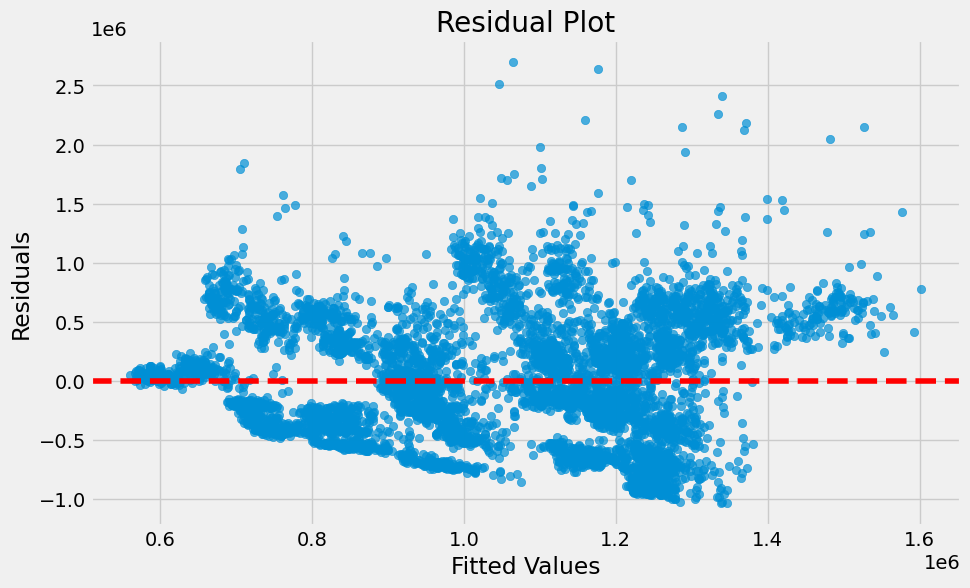

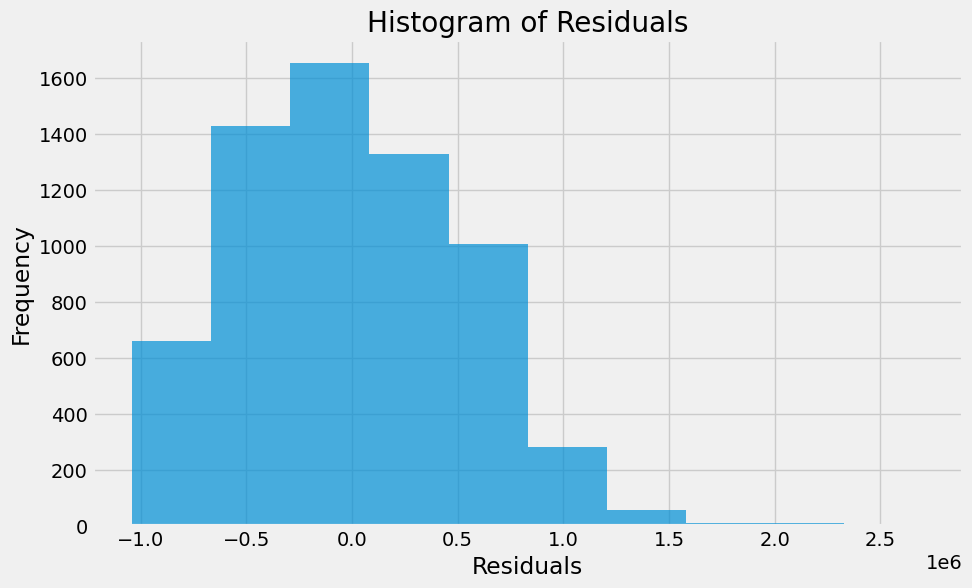

<Figure size 1000x600 with 0 Axes>

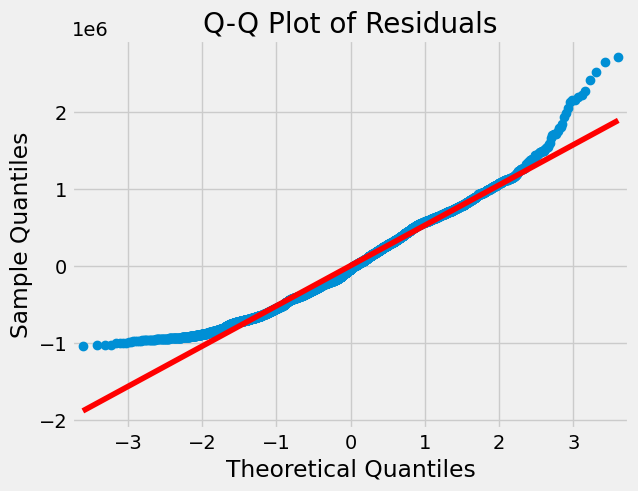

In [54]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


X = df[['temperature', 'fuel_price','cpi','unemployment','season','holiday_flag','store']]
y = df['weekly_sales']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
residuals = model.resid

plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuals, alpha=0.7)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=10, alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 5148
Testing set size: 1287


In [56]:
X_train

,const,temperature,fuel_price,cpi,unemployment,season,holiday_flag,store
1033,1.0,75.32,2.582,214.878556,6.315,3,0,8
915,1.0,20.70,3.372,192.058484,8.818,3,0,7
5903,1.0,61.24,3.130,126.546161,9.003,4,0,42
2083,1.0,69.19,3.906,136.213613,7.806,2,0,15
5943,1.0,87.40,3.743,129.240581,8.257,2,0,42
...,...,...,...,...,...,...,...,...
3772,1.0,39.32,3.420,137.251185,7.827,4,0,27
5191,1.0,54.44,2.708,210.376263,8.476,1,0,37
5226,1.0,86.71,3.684,214.297294,8.177,1,0,37
5390,1.0,44.64,3.428,130.071032,12.890,4,1,38


In [57]:
print(model.summary())


y_pred = model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

                            OLS Regression Results                            
Dep. Variable:           weekly_sales   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     151.8
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          4.51e-208
Time:                        18:24:43   Log-Likelihood:                -93860.
No. Observations:                6435   AIC:                         1.877e+05
Df Residuals:                    6427   BIC:                         1.878e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.962e+06   7.88e+04     24.903   

In [58]:
model.params


,0
const,1.962476e+06
temperature,-8.602759e+02
fuel_price,1.180960e+04
cpi,-2.326622e+03
unemployment,-2.203199e+04
season,8.972323e+03
holiday_flag,6.711894e+04
store,-1.538934e+04


In [59]:
coefficients = model.params

for variable, coefficient in coefficients.items():
  if variable != 'const':  # Exclude the constant term
    print(f"For a one-unit increase in {variable}, the weekly sales is expected to change by {coefficient} units, assuming all other variables are held constant.")


For a one-unit increase in temperature, the weekly sales is expected to change by -860.2759227872664 units, assuming all other variables are held constant.
For a one-unit increase in fuel_price, the weekly sales is expected to change by 11809.595382352532 units, assuming all other variables are held constant.
For a one-unit increase in cpi, the weekly sales is expected to change by -2326.6222476114435 units, assuming all other variables are held constant.
For a one-unit increase in unemployment, the weekly sales is expected to change by -22031.986060979536 units, assuming all other variables are held constant.
For a one-unit increase in season, the weekly sales is expected to change by 8972.323267968275 units, assuming all other variables are held constant.
For a one-unit increase in holiday_flag, the weekly sales is expected to change by 67118.94155216488 units, assuming all other variables are held constant.
For a one-unit increase in store, the weekly sales is expected to change by 

In [60]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 523166.1649178795


In [61]:
y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared on testing set: {r2}")
print(f"Mean Squared Error on testing set: {mse}")

R-squared on testing set: 0.1503990128897832
Mean Squared Error on testing set: 273702836114.8819


In [62]:
p_values = model.pvalues

for variable, p_value in p_values.items():
  if variable != 'const':
    if p_value < 0.05:
      print(f"The coefficient for {variable} is statistically significant (p-value: {p_value:.4f}).")
    else:
      print(f"The coefficient for {variable} is not statistically significant (p-value: {p_value:.4f}).")

The coefficient for temperature is statistically significant (p-value: 0.0252).
The coefficient for fuel_price is not statistically significant (p-value: 0.4276).
The coefficient for cpi is statistically significant (p-value: 0.0000).
The coefficient for unemployment is statistically significant (p-value: 0.0000).
The coefficient for season is not statistically significant (p-value: 0.1458).
The coefficient for holiday_flag is statistically significant (p-value: 0.0106).
The coefficient for store is statistically significant (p-value: 0.0000).


In [63]:
coefficients = model.params

for variable, coefficient in coefficients.items():
  if variable != 'const':
    print(f"For a one-unit increase in {variable}, the weekly sales is expected to change by {coefficient} units, assuming all other variables are held constant.")

For a one-unit increase in temperature, the weekly sales is expected to change by -860.2759227872664 units, assuming all other variables are held constant.
For a one-unit increase in fuel_price, the weekly sales is expected to change by 11809.595382352532 units, assuming all other variables are held constant.
For a one-unit increase in cpi, the weekly sales is expected to change by -2326.6222476114435 units, assuming all other variables are held constant.
For a one-unit increase in unemployment, the weekly sales is expected to change by -22031.986060979536 units, assuming all other variables are held constant.
For a one-unit increase in season, the weekly sales is expected to change by 8972.323267968275 units, assuming all other variables are held constant.
For a one-unit increase in holiday_flag, the weekly sales is expected to change by 67118.94155216488 units, assuming all other variables are held constant.
For a one-unit increase in store, the weekly sales is expected to change by 

In [66]:
X_train

,const,temperature,fuel_price,cpi,unemployment,season,holiday_flag,store
1033,1.0,75.32,2.582,214.878556,6.315,3,0,8
915,1.0,20.70,3.372,192.058484,8.818,3,0,7
5903,1.0,61.24,3.130,126.546161,9.003,4,0,42
2083,1.0,69.19,3.906,136.213613,7.806,2,0,15
5943,1.0,87.40,3.743,129.240581,8.257,2,0,42
...,...,...,...,...,...,...,...,...
3772,1.0,39.32,3.420,137.251185,7.827,4,0,27
5191,1.0,54.44,2.708,210.376263,8.476,1,0,37
5226,1.0,86.71,3.684,214.297294,8.177,1,0,37
5390,1.0,44.64,3.428,130.071032,12.890,4,1,38


Predicted Weekly Sales: 2436    1.208666e+06
3361    1.102996e+06
233     1.272196e+06
3667    1.112056e+06
5011    7.210852e+05
            ...     
2600    1.171954e+06
6308    6.339568e+05
6292    6.670546e+05
151     1.274898e+06
2344    1.277452e+06
Length: 1287, dtype: float64
Actual Weekly Sales: 2436    1138800.32
3361    1304850.67
233     1769296.25
3667    1077640.13
5011     428851.99
           ...    
2600    1492060.89
6308     801098.43
6292     890689.51
151     2066187.72
2344     816138.33
Name: weekly_sales, Length: 1287, dtype: float64
R-squared: 0.1503990128897832
Mean Squared Error: 273702836114.8819


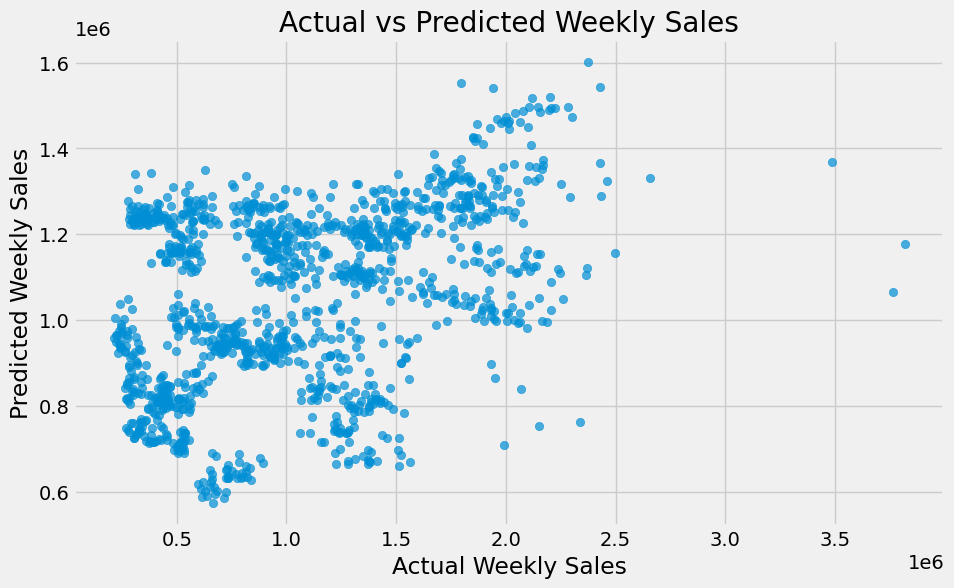

Predicted Weekly Sales for new data: 0    1.038045e+06
dtype: float64


In [67]:
y_pred = model.predict(X_test)


print("Predicted Weekly Sales:", y_pred)
if 'y_test' in locals():
  print("Actual Weekly Sales:", y_test)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Actual vs Predicted Weekly Sales')
plt.show()


new_data = pd.DataFrame({'const': [1], 'temperature': [82], 'fuel_price': [3.6], 'cpi': [136.213613	],'unemployment':[8.257	],'season': [2],'holiday_flag	':[0],'store':[27]})
new_prediction = model.predict(new_data)
print("Predicted Weekly Sales for new data:", new_prediction)


In [68]:
model.save('my_walmart_sales_model.h5')


from google.colab import files
files.download('my_walmart_sales_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
from sklearn.linear_model import Ridge, Lasso


ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)


y_pred_ridge = ridge_model.predict(X_test)


r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"\nRidge Regression:")
print(f"R-squared: {r2_ridge}")
print(f"Mean Squared Error: {mse_ridge}")


lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)


y_pred_lasso = lasso_model.predict(X_test)


r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"\nLasso Regression:")
print(f"R-squared: {r2_lasso}")
print(f"Mean Squared Error: {mse_lasso}")


Ridge Regression:
R-squared: 0.14840200408768434
Mean Squared Error: 274346181616.0918

Lasso Regression:
R-squared: 0.14840051593983306
Mean Squared Error: 274346661029.71494
